In [44]:
### UCSD ECE269 Winter 2018
### Homework Set #5, Programming Assignment
### By Shouvik Ganguly and Young-Han Kim

### Part 1(a): Function definition

function OMP(b, thresh, A)
    m=length(A[:,1])
    n=length(A[1,:])
    rt=b#r0
    J=[]#J0
    Atilt=[]#A~~
    #x=zeros(n)
    for t=1:m
        jt=indmax( abs.(A'*rt)./sum((A'.*A'),2) )
        at=A[:,jt]
        if t==1
            J=[jt]
            Atilt=at
        else
            J=[J jt]
            Atilt=[Atilt at]
        end        
        A[:,jt]=zeros(m)
        x=pinv(Atilt)*b
        if t==1
            bt=Atilt*x[1]
        else
            bt=Atilt*x
        end
        rt=b-bt
        
        if norm(rt)<thresh
            #return J,x
            break
        end
    end
    return J,x;
end      

OMP (generic function with 1 method)

## For efficiency,
* I vectorized the calculation, thus I can get rid of the for loop for finding the maximum j
* I use build-in function Pinv, which is faster than inv(T'T)T'

In [45]:
m = 50; N = 1000; kmax = 25;
srand(1234);
pES = zeros(1, kmax); #probability of error in support
avgrelerr = zeros(1, kmax); #average relative error
numsim = 100;
thresh = 0.01;
for k = 1:kmax

    relerr = zeros(1, numsim); #relative error at each run
    supportdist = zeros(1, numsim); #support distance
    
    for ii = 1:numsim 
        A = randn(m, N);
        x=zeros(N);
        cardinal=[rand(1:N)];x[cardinal[1]]=rand([1,-1])*(rand()*9+1)
        while length(cardinal)<k
            tmp = rand(1:N)
            if !(tmp in cardinal)
                x[tmp]=rand([1,-1])*(rand()*9+1)
                cardinal=[cardinal tmp]
            end
        end
        b = A*x;
        J,xrec = OMP(b, thresh, A);
        #compute supportdist[ii] and relerr[ii]
        #println(xrec)
        #println(x)
        relerr[ii]=norm(x-xrec)/norm(x)
        supportdist[ii]=( max(length(cardinal),length(J))-length(intersect(cardinal,J)) )/max(length(cardinal),length(J))
        
    
    end
    
    avgrelerr[k] = mean(relerr);
    pES[k] = mean(supportdist);
    
    println(k)
end

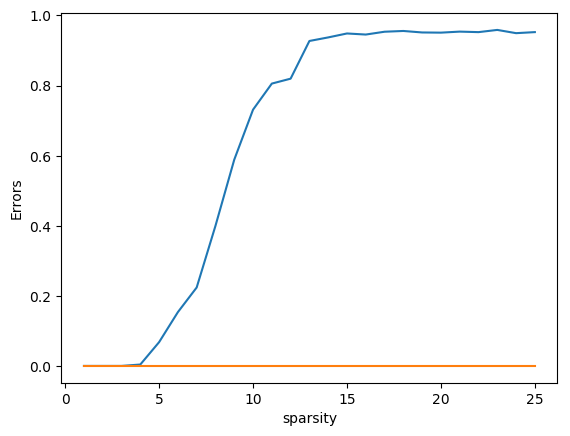

PyObject <matplotlib.text.Text object at 0x7f02a5787048>

In [51]:
#Plot your results
using PyPlot
#plot(1:25, pES, label="Probability of error in support")
plot(1:25,pES[:], label="Probability of error in support")
plot(1:25, avgrelerr[:], label="Average Relative Error")
xlabel("sparsity")
ylabel("Errors")

